In [1]:
import gradio as gr
import ollama
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\PROJECTS\Clustering\Customer Segmentation\customer_segmentation.csv")
df.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe(include="all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [6]:
df.isnull().sum()   # Income has misssing values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols.skew()


ID                      0.039832
Year_Birth             -0.349944
Income                  6.763487
Kidhome                 0.635288
Teenhome                0.407115
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       2.418569
NumWebPurchases         1.382794
NumCatalogPurchases     1.880989
NumStorePurchases       0.702237
NumWebVisitsMonth       0.207926
AcceptedCmp3            3.291705
AcceptedCmp4            3.241574
AcceptedCmp5            3.291705
AcceptedCmp1            3.555444
AcceptedCmp2            8.472093
Complain               10.188972
Z_CostContact           0.000000
Z_Revenue               0.000000
Response                1.971555
dtype: float64

In [9]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# EDA with LLM

In [11]:
# Function to Perform EDA and Generate Visualizations
def eda_analysis(file_path):
    df = pd.read_csv(file_path)
    
    # Fill missing values with median for numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].median(), inplace=True)
    
    # Fill missing values with mode for categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Data Summary
    summary = df.describe(include='all').to_string()
    
    # Missing Values
    missing_values = df.isnull().sum().to_string()

    # Generate AI Insights
    insights = generate_ai_insights(summary)
    
    # Generate Data Visualizations
    plot_paths = generate_visualizations(df)
    
    return f"\n Data Loaded Successfully!\n\n Summary:\n{summary}\n\n Missing Values:\n{missing_values}\n\n AI Insights:\n{insights}", plot_paths

# AI-Powered Insights using Mistral-7B (Ollama)
def generate_ai_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Function to Generate Data Visualizations
def generate_visualizations(df):
    plot_paths = []
    
    # Histograms for Numeric Columns
    for col in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], bins=30, kde=True, color="blue")
        plt.title(f"Distribution of {col}")
        path = f"{col}_distribution.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()
    
    # Correlation Heatmap (only numeric columns)
    numeric_df = df.select_dtypes(include=['number'])
    if not numeric_df.empty:
        plt.figure(figsize=(8,5))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        path = "correlation_heatmap.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()

    return plot_paths

# Gradio Interface
demo = gr.Interface(
    fn=eda_analysis,
    inputs=gr.File(type="filepath"),
    outputs=[gr.Textbox(label="EDA Report"), gr.Gallery(label="Data Visualizations")],
    title="📊 LLM-Powered Exploratory Data Analysis (EDA)",
    description="Upload any dataset CSV file and get automated EDA insights with AI-powered analysis and visualizations."
)

# Launch the Gradio App
demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


# Data Cleaning / Data Preparation

In [13]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [14]:
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

today = pd.to_datetime('today')
df['Customer_Tenure_Days'] = (today - df['Dt_Customer']).dt.days
df['Customer_Tenure_Months'] = df['Customer_Tenure_Days'] // 30
df['Customer_Tenure_Years'] = df['Customer_Tenure_Days'] // 365


In [15]:
df["Total_Child"] = df['Kidhome'] + df['Teenhome']
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntFishProducts'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts']
df['Accepted_counts'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Total_Purchase'] = df['NumWebPurchases'] + df['NumStorePurchases']  + df['NumCatalogPurchases'] + df['NumDealsPurchases']

In [16]:
cols_to_drop = ['ID','Year_Birth',
    'Kidhome', 'Teenhome',
    'MntWines', 'MntFruits',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumDealsPurchases',
    'Dt_Customer','Customer_Tenure_Months','Customer_Tenure_Years','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'  # Optional
]
df.drop(columns=cols_to_drop, inplace=True)


In [17]:
df.isnull().sum()

Education                0
Marital_Status           0
Income                  24
Recency                  0
NumWebVisitsMonth        0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Customer_Tenure_Days     0
Total_Child              0
Total_Spent              0
Accepted_counts          0
Total_Purchase           0
dtype: int64

In [18]:
df.groupby('Marital_Status')['Response'].mean()


Marital_Status
Absurd      0.500000
Alone       0.333333
Divorced    0.206897
Married     0.113426
Single      0.220833
Together    0.103448
Widow       0.246753
YOLO        0.500000
Name: Response, dtype: float64

In [19]:
df.groupby('Education')['Response'].mean()


Education
2n Cycle      0.108374
Basic         0.037037
Graduation    0.134871
Master        0.154054
PhD           0.207819
Name: Response, dtype: float64

In [20]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.median()))

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ['Income', 'Total_Spent', 'Customer_Tenure_Days', 'Total_Purchase','NumWebVisitsMonth']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [22]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

In [23]:
df.skew()

Income                      6.800115
Recency                    -0.001987
NumWebVisitsMonth           0.207926
Complain                   10.188972
Z_CostContact               0.000000
Z_Revenue                   0.000000
Response                    1.971555
Customer_Tenure_Days       -0.015216
Total_Child                 0.415970
Total_Spent                 0.860841
Accepted_counts             2.722633
Total_Purchase              0.252111
Education_Basic             6.209494
Education_Graduation       -0.012509
Education_Master            1.804515
Education_PhD               1.374287
Marital_Status_Alone       27.288554
Marital_Status_Divorced     2.603803
Marital_Status_Married      0.469889
Marital_Status_Single       1.393555
Marital_Status_Together     1.101404
Marital_Status_Widow        5.114835
Marital_Status_YOLO        33.443963
dtype: float64

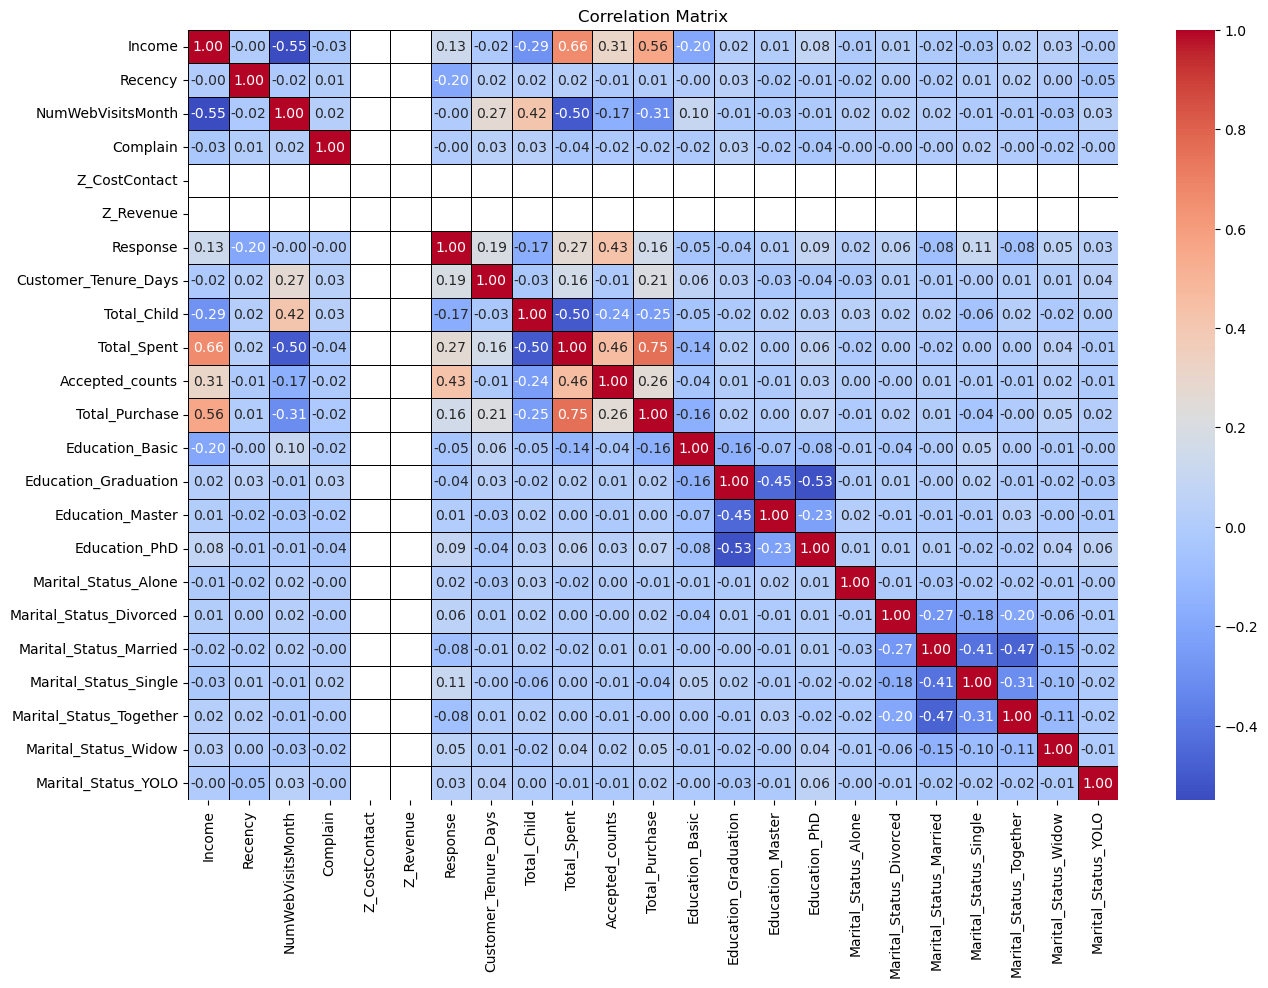

In [24]:

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f",cmap="coolwarm",linewidths=0.5,linecolor='black')
plt.title("Correlation Matrix")
plt.show()


In [25]:
df = df.drop(columns=['Z_CostContact','Z_Revenue','Response',
                      'Marital_Status_Alone', 'Marital_Status_Divorced',
                      'Marital_Status_Married','Marital_Status_Single',
                      'Marital_Status_Together', 'Marital_Status_Widow',
                      'Marital_Status_YOLO','Education_Basic','Recency'])
# constant values (useless for clustering) & Response is a supervised label
# Material Status having low correlation & adds noise
# Having very weak correlation of education 
# Recency also low correlated with all columns

In [26]:
df

,Income,NumWebVisitsMonth,Complain,Customer_Tenure_Days,Total_Child,Total_Spent,Accepted_counts,Total_Purchase,Education_Graduation,Education_Master,Education_PhD
0,0.235922,0.693904,0,1.531185,0,1.679417,0,1.320826,True,False,False
1,-0.235192,-0.130463,0,-1.190545,2,-0.961275,0,-1.154596,True,False,False
2,0.774184,-0.542647,0,-0.205773,0,0.282673,0,0.799685,True,False,False
3,-1.022033,0.281720,0,-1.061881,1,-0.918094,0,-0.894025,True,False,False
4,0.242114,-0.130463,0,-0.953012,1,-0.305254,0,0.539114,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
2235,0.359153,-0.130463,0,0.135680,1,1.221032,0,0.408829,True,False,False
2236,0.470640,0.693904,0,-1.655713,3,-0.268717,1,0.929970,False,False,True
2237,0.189705,0.281720,0,-0.982703,0,1.054951,1,0.539114,True,False,False
2238,0.679594,-0.954831,0,-0.977755,1,0.393948,0,1.060255,False,True,False


In [27]:
x=df

# KMeans Clustering

In [29]:
from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
    kmean = KMeans(n_clusters= k , init= "k-means++")
    kmean.fit(x)
    wcss.append(kmean.inertia_)

print(wcss)

[14766.108928571428, 9743.962329198042, 8482.461073794013, 7511.518063526129, 6997.782163056932, 6524.541378189663, 6246.002939983292, 5683.593993878357, 5403.249327472259, 5207.232381616314]


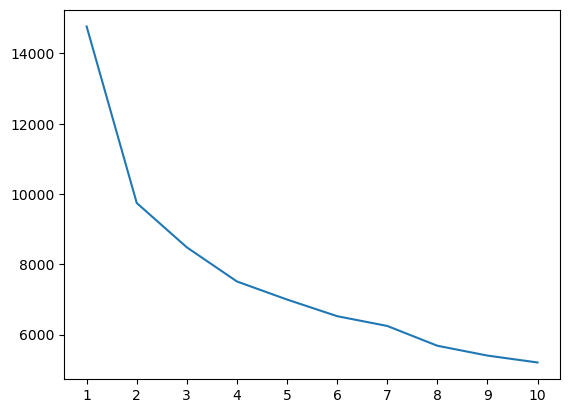

In [30]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))

plt.show()

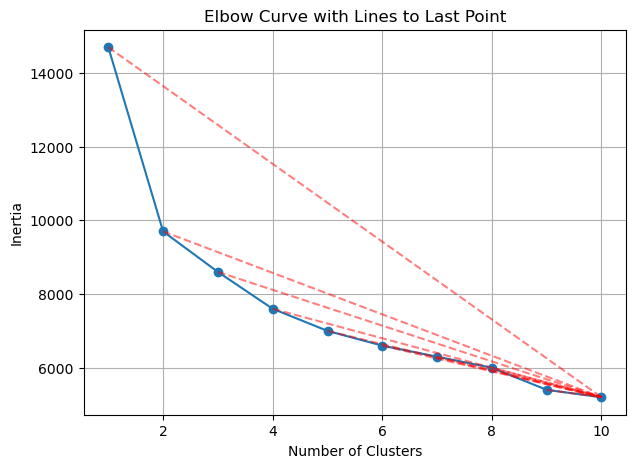

In [31]:
import matplotlib.pyplot as plt

# Example inertia values (replace with your actual values)
inertia = [14700, 9700, 8600, 7600, 7000, 6600, 6300, 6000, 5400, 5200]
clusters = list(range(1, 11))

# Plot elbow curve
plt.figure(figsize=(7, 5))
plt.plot(clusters, inertia, marker='o')

# Draw lines from each point to the last point
last_cluster = clusters[-1]
last_inertia = inertia[-1]

for i in range(len(clusters) - 1):  # Skip the last point itself
    plt.plot([clusters[i], last_cluster], [inertia[i], last_inertia], 'r--', alpha=0.5)

plt.title('Elbow Curve with Lines to Last Point')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



In [32]:
# Modelling

kmean = KMeans(n_clusters=4,
               init='k-means++')
ymean = kmean.fit_predict(x)
ymean

array([0, 1, 3, ..., 3, 3, 2])

In [33]:
df["cluster"] = pd.DataFrame(ymean)
df

,Income,NumWebVisitsMonth,Complain,Customer_Tenure_Days,Total_Child,Total_Spent,Accepted_counts,Total_Purchase,Education_Graduation,Education_Master,Education_PhD,cluster
0,0.235922,0.693904,0,1.531185,0,1.679417,0,1.320826,True,False,False,0
1,-0.235192,-0.130463,0,-1.190545,2,-0.961275,0,-1.154596,True,False,False,1
2,0.774184,-0.542647,0,-0.205773,0,0.282673,0,0.799685,True,False,False,3
3,-1.022033,0.281720,0,-1.061881,1,-0.918094,0,-0.894025,True,False,False,1
4,0.242114,-0.130463,0,-0.953012,1,-0.305254,0,0.539114,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.359153,-0.130463,0,0.135680,1,1.221032,0,0.408829,True,False,False,0
2236,0.470640,0.693904,0,-1.655713,3,-0.268717,1,0.929970,False,False,True,1
2237,0.189705,0.281720,0,-0.982703,0,1.054951,1,0.539114,True,False,False,3
2238,0.679594,-0.954831,0,-0.977755,1,0.393948,0,1.060255,False,True,False,3


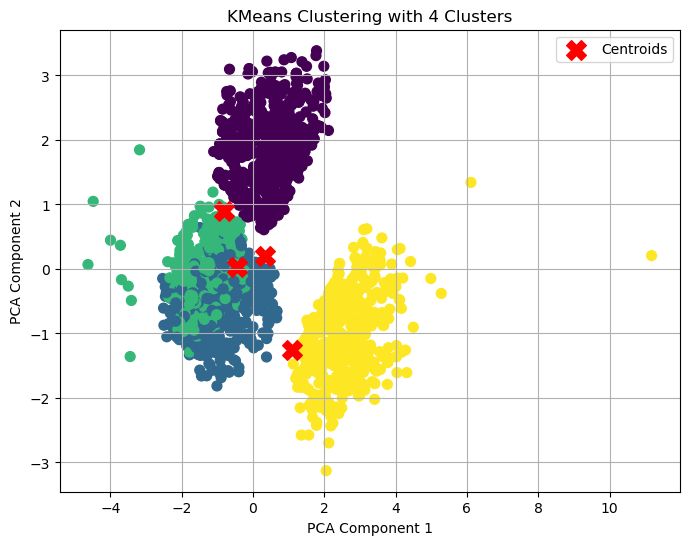

In [34]:
from sklearn.decomposition import PCA
# Reduce dimensions for visualization
pca = PCA(n_components=0.95)
reduced = pca.fit_transform(x)  # x should be your scaled numerical data

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=ymean, cmap='viridis', s=50)
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], 
            c='red', s=200, marker='X', label='Centroids')
plt.title('KMeans Clustering with 4 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


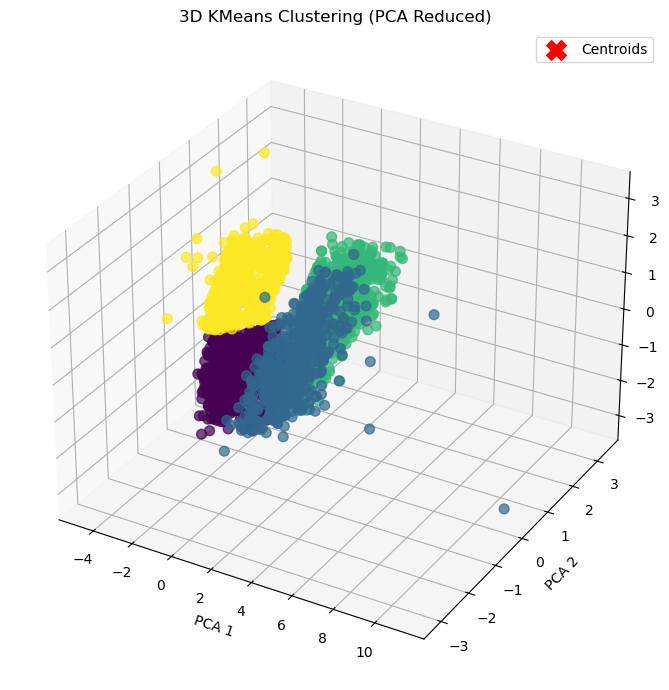

In [35]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Step 1: Reduce dimensions
pca = PCA(n_components=3)
reduced_3d = pca.fit_transform(x)  # x is your scaled data

# Step 2: Fit KMeans on reduced 3D data
kmean = KMeans(n_clusters=4, init='k-means++', random_state=42)
ymean = kmean.fit_predict(reduced_3d)

# Step 3: Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Cluster points
sc = ax.scatter(reduced_3d[:, 0], reduced_3d[:, 1], reduced_3d[:, 2],
                c=ymean, cmap='viridis', s=50, alpha=0.7)

# Use centroids directly (already in reduced 3D space)
centroids = kmean.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='red', s=200, marker='X', label='Centroids')

# Labels
ax.set_title('3D KMeans Clustering (PCA Reduced)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()
plt.tight_layout()
plt.show()


# HC/Agglomerative Clustring

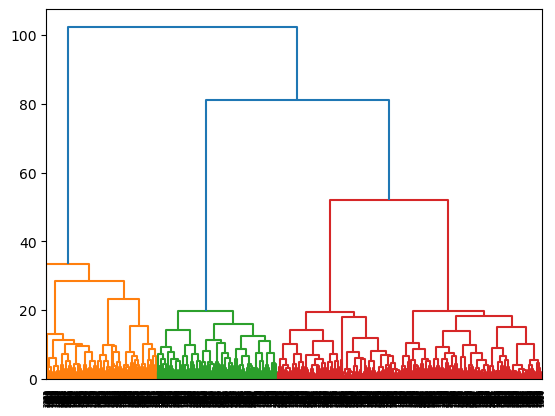

In [37]:
import scipy.cluster.hierarchy as sch
df = sch.linkage(x , method = "ward")
dendo = sch.dendrogram(df)
plt.show()

In [38]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Assuming x is your data
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x)

# Ensure df is a DataFrame
df = pd.DataFrame(x)  # if not already defined
df["cluster"] = y_hc  # This works if y_hc is same length as df

df.head()


,Income,NumWebVisitsMonth,Complain,Customer_Tenure_Days,Total_Child,Total_Spent,Accepted_counts,Total_Purchase,Education_Graduation,Education_Master,Education_PhD,cluster
0,0.235922,0.693904,0,1.531185,0,1.679417,0,1.320826,True,False,False,2
1,-0.235192,-0.130463,0,-1.190545,2,-0.961275,0,-1.154596,True,False,False,1
2,0.774184,-0.542647,0,-0.205773,0,0.282673,0,0.799685,True,False,False,0
3,-1.022033,0.281720,0,-1.061881,1,-0.918094,0,-0.894025,True,False,False,1
4,0.242114,-0.130463,0,-0.953012,1,-0.305254,0,0.539114,False,False,True,1


# Visualising The Cluster

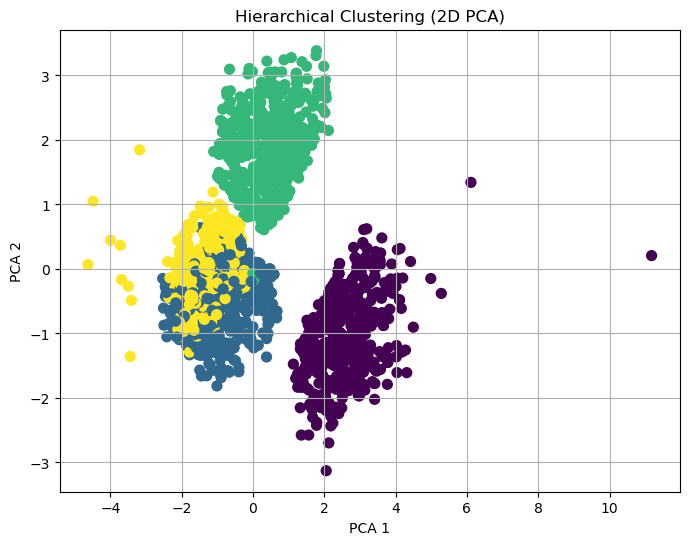

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_hc, cmap='viridis', s=50)
plt.title('Hierarchical Clustering (2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


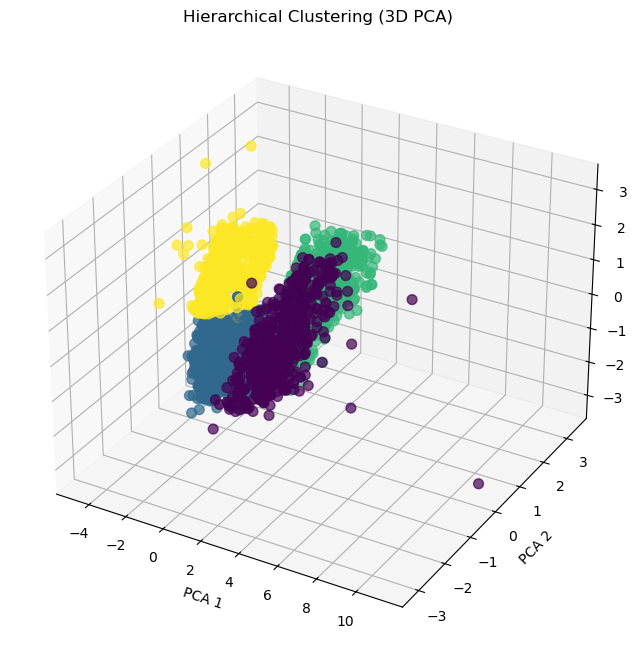

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3D
pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(x)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(reduced_3d[:, 0], reduced_3d[:, 1], reduced_3d[:, 2], 
                c=y_hc, cmap='viridis', s=50, alpha=0.7)

ax.set_title('Hierarchical Clustering (3D PCA)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()


# DBSCAN Clustering

In [43]:
from sklearn.cluster import DBSCAN
import numpy as np

for r in range(1, 11):
    for m in range(3, 10):
        dbs = DBSCAN(eps=r, min_samples=m)
        db_clust = dbs.fit_predict(df)
        
        if len(np.unique(db_clust)) == 5:
            print("eps:", r)
            print("min_samples:", m)
            break
    else:
        continue
    break
print("eps:", r)
print("min_samples:", m)

eps: 10
min_samples: 9


In [44]:
dbs = DBSCAN( eps=10, min_samples = 9)
y_dbs = dbs.fit_predict(df)

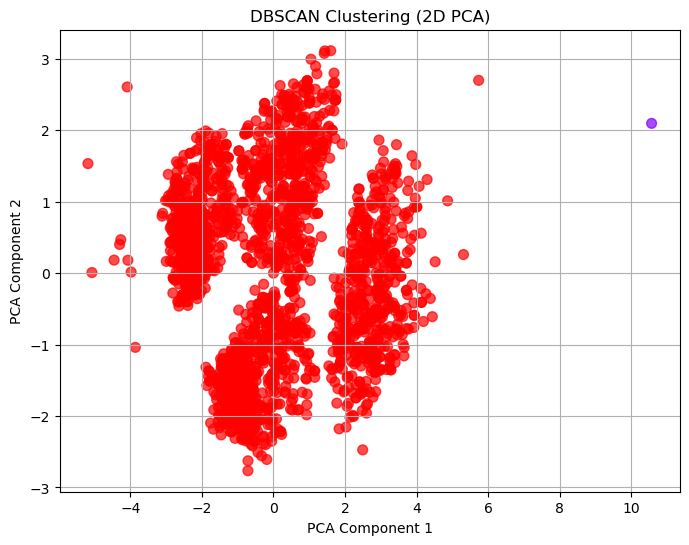

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)

# Plotting the DBSCAN clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=y_dbs, cmap='rainbow', s=50, alpha=0.7)
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


# 3d View


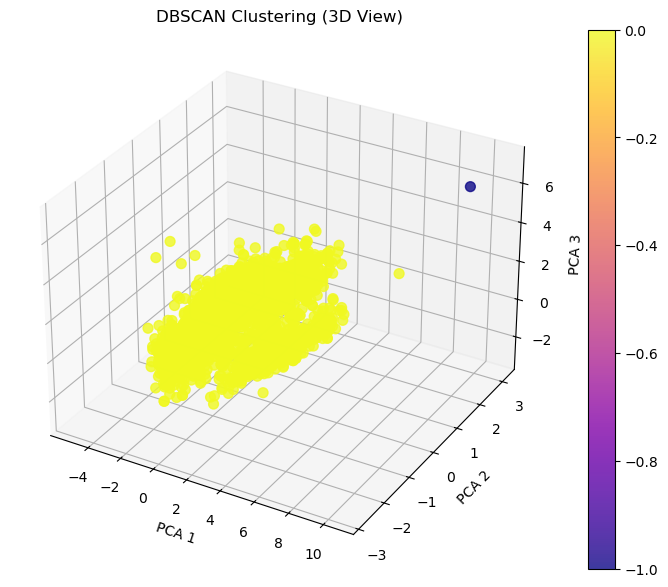

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Fit DBSCAN
dbs = DBSCAN(eps=10, min_samples=9)
y_dbs = dbs.fit_predict(df)

# Reduce data to 3 components using PCA for 3D visualization
pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(df)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot
scatter = ax.scatter(reduced_3d[:, 0], reduced_3d[:, 1], reduced_3d[:, 2],
                     c=y_dbs, cmap='plasma', s=50, alpha=0.8)

ax.set_title('DBSCAN Clustering (3D View)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.colorbar(scatter)
plt.show()


# Cluster 0: High-Value Loyal Customers
# High spenders, frequent and consistent purchases, very responsive to offers.
# Strategy: Prioritize for premium services, loyalty rewards, and early access promotions.

# Cluster 1: Mid-Tier Engaged Customers
# Moderate purchase volume, occasional website visits, moderately responsive.
# Strategy: Upselling, targeted promotions, bundled offers to increase engagement.

# Cluster 2: Low-Value or Infrequent Customers
# Inactive or low engagement, low total spend, fewer purchases.
# Strategy: Cost-effective re-engagement campaigns or retention through discounts.

# Cluster 3: New or Price-Sensitive Customers
# Recent users or budget-conscious, sensitive to pricing and deals.
# Strategy: Onboarding journeys, personalized welcome offers, price-driven marketing.